Q2. **Train a Neural Network**
Let us design a neural network to classify flowers from Iris dataset.
1. **Implement a single hidden layer MLP**. Final output layer will have **3** neurons, one for each result. **Arch: [Input, hidden, output]**
2. **Now use an NN with two hidden layers**. The **first hidden layer** has **9** neurons. The **second hidden layer** has **3** neurons. Arch: [Input,hidden1,hidden2,output]

(i) **Use keras to design the NN model and train on the iris data**.

(ii) Draw the **schematic diagram** of the **NN 2** along with all the weights and **specify suitable activation function**.
 **How many trainable parameters are there**?
[ 2 (NN1) + 3 (NN2) + 2(diagram)= 7 Marks]

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 8)

Using TensorFlow backend.


In [3]:
import numpy as np
import pandas as pd

In [4]:
headers = ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm", "class"]

In [5]:
data = pd.read_csv('iris.data', header=None, names=headers)
data.head()

sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm        class  
0                0.2  Iris-setosa  
1                0.2  Iris-setosa  
2                0.2  Iris-setosa  
3                0.2  Iris-setosa  
4                0.2  Iris-setosa

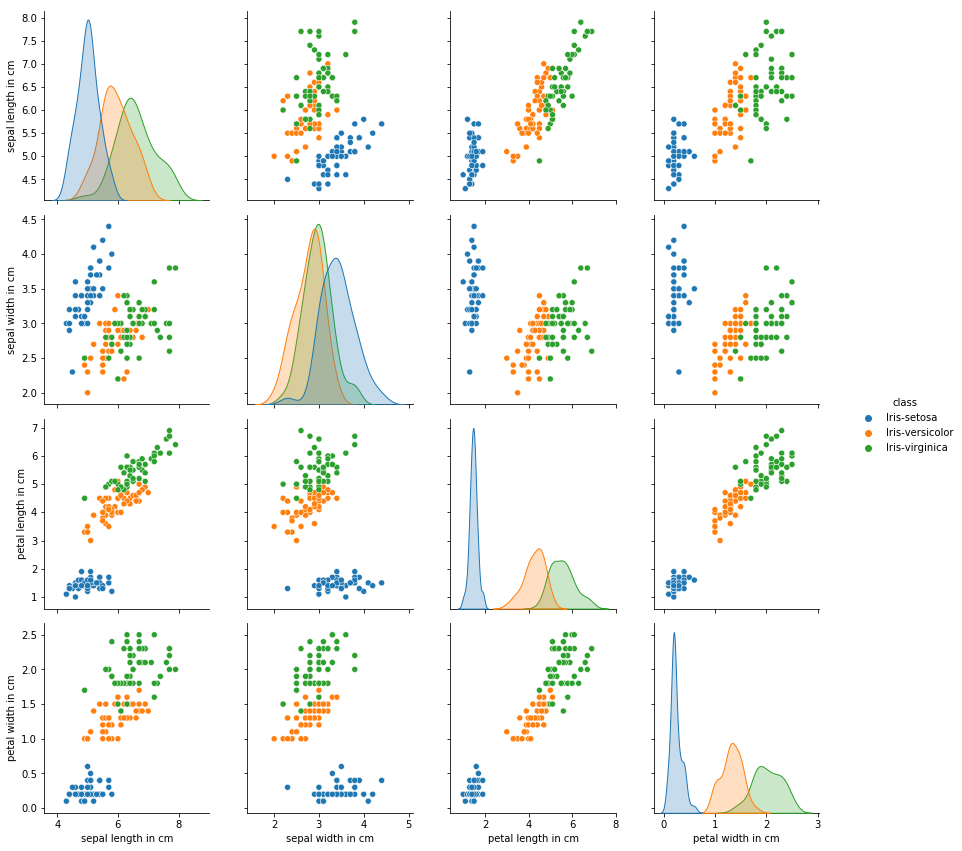

In [6]:
sns.pairplot(data, hue="class", size=3, diag_kind="kde")

In [7]:
dataset = data.values
X = dataset[::, 0:4].astype(np.float)
Y = dataset[::, 4:]

In [8]:
print(type(X), type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [10]:
def single_hidden_layer_model():
  # Create Model
  model = Sequential()
  model.add(Dense(8, input_dim=4, activation='relu'))
  model.add(Dense(9, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  # Compile Model
  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [11]:
estimator1 = KerasClassifier(build_fn=single_hidden_layer_model, epochs=200, batch_size=5, verbose=0)

In [12]:
kfold = KFold(n_splits=10, shuffle=True)

In [13]:
results1 = cross_val_score(estimator1, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results1.mean()*100, results1.std()*100))

Baseline: 96.67% (6.15%)


In [14]:
single_hidden_layer_model().summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_31 (Dense)             (None, 9)                 81        
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 30        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [15]:
def double_hidden_layer_model():
  # Create Model
  model = Sequential()
  model.add(Dense(8, input_dim=4, activation='relu'))
  model.add(Dense(9, activation='relu', name='hidden1'))
  model.add(Dense(3, activation='sigmoid', name='hidden2'))
  model.add(Dense(3, activation='softmax'))
  # Compile Model
  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [16]:
estimator2 = KerasClassifier(build_fn=double_hidden_layer_model, epochs=200, batch_size=5, verbose=0)

In [17]:
results2 = cross_val_score(estimator2, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results2.mean()*100, results2.std()*100))

Baseline: 84.67% (22.32%)


In [18]:
double_hidden_layer_model().summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 8)                 40        
_________________________________________________________________
hidden1 (Dense)              (None, 9)                 81        
_________________________________________________________________
hidden2 (Dense)              (None, 3)                 30        
_________________________________________________________________
dense_54 (Dense)             (None, 3)                 12        
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [19]:
import keras.utils.vis_utils
from importlib import reload
reload(keras.utils.vis_utils)

<module 'keras.utils.vis_utils' from '/opt/anaconda2/envs/NLP/lib/python3.7/site-packages/keras/utils/vis_utils.py'>

In [20]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(double_hidden_layer_model(), to_file=dot_img_file, show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [21]:
# !pip3 install ann_visualizer

In [22]:
from ann_visualizer.visualize import ann_viz
ann_viz(double_hidden_layer_model(), view=True)

ModuleNotFoundError: No module named 'graphviz'